In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipychord3 import utils

In [3]:
from scipy.optimize import curve_fit

In [4]:
def double_gaussian(x, a, b, c, d):
        return a*(np.exp(-(x-b+90)**2/(2*c**2)) + np.exp(-(x-b-90)**2/(2*c**2))) + d

### generate some test data

In [5]:
x = linspace(-180, 180, 360)

In [6]:
y = double_gaussian(x, 40, 0, 4, 0)\
  + double_gaussian(x, 5, 0, 15, 100)\
  + np.exp(-(x)**2/(2*3**2)) 

<IPython.core.display.Javascript object>


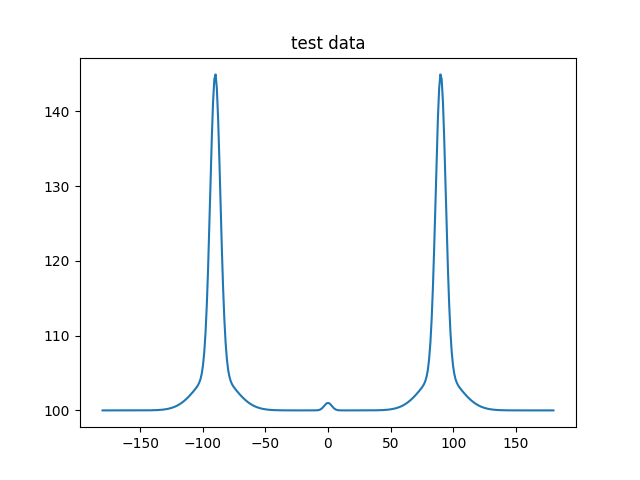

Text(0.5, 1.0, 'test data')

In [7]:
figure()
plot(x, y)
title('test data')

### remove unwanted data

In [8]:
idxs =  utils.indices_below(y, 0.9*y.max(), extend_window=20) \
     &  utils.remove_around(y, int(round(y.shape[0]/2)), 10)

x_fit = x[idxs]
y_fit = y[idxs]

<IPython.core.display.Javascript object>


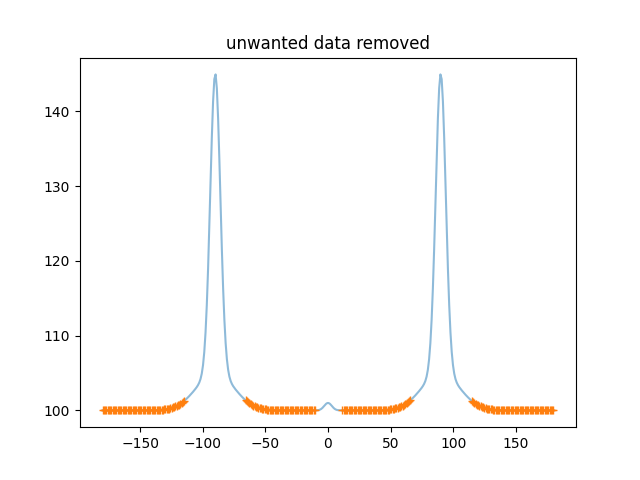

Text(0.5, 1.0, 'unwanted data removed')

In [9]:
figure()
plot(x, y, alpha=0.5)
plot(x_fit, y_fit, '+')
title('unwanted data removed')

### fit data, with double gaussian with b=0

In [10]:
fit_func = lambda x, a, c, d: double_gaussian(x, a, 0, c, d)
popt = curve_fit(fit_func, x_fit, y_fit, 
                     p0=[y_fit.max(), 10, y_fit.min()],
                     bounds=([0, 0, 0.0], [np.inf, 30, np.inf]))

In [11]:
a, c, d = popt[0]
popt

(array([  5.00038973,  14.99951795, 100.00002537]),
 array([[ 3.08166123e-07, -2.64246592e-07,  2.23232269e-09],
        [-2.64246592e-07,  2.44472122e-07, -2.76420444e-09],
        [ 2.23232269e-09, -2.76420444e-09,  1.45626768e-10]]))

<IPython.core.display.Javascript object>


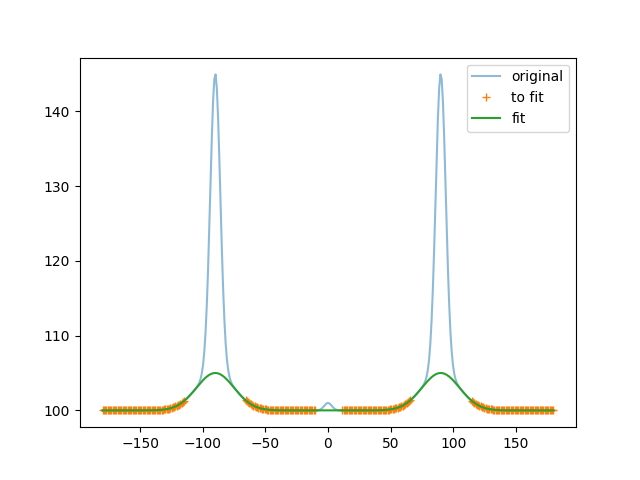

In [12]:
figure()
plot(x, y, alpha=0.5, label='original')
plot(x_fit, y_fit, '+', label='to fit')
plot(x, double_gaussian(x, a, 0, c, d), label='fit')
legend()